# Cuantificación de la entropía y la complejidad en una taza de café

### Modelo en el que interactúan las partículas

Regla de transición para este modelo: en cada time step, se selecciona aleatoriamente un par de partículas, adyacentes horizontal o verticalmente, y las posiciones de las partículas se intercambian.

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [115]:
def ColumnaPeriodica(pn,pnuevaColumna):
    if pnuevaColumna>(pn-1):
        pnuevaColumna=0
        return pnuevaColumna
    elif pnuevaColumna<0:
        pnuevaColumna=(pn-1)
        return pnuevaColumna
    else:
        return pnuevaColumna
    
def FilaPeriodica(pn,pnuevaFila):
    if pnuevaFila>(pn-1):
        pnuevaFila=0
        return pnuevaFila
    elif pnuevaFila<0:
        pnuevaFila=(pn-1)
        return pnuevaFila
    else:
        return pnuevaFila

    
def Vecinos(pn,pmatriz,pfila,pcolumna):
    vecinoDerecha=pmatriz[FilaPeriodica(pn,pfila),ColumnaPeriodica(pn,pcolumna+1)]
    vecinoIzquierda=pmatriz[FilaPeriodica(pn,pfila),ColumnaPeriodica(pn,pcolumna-1)]
    vecinoArriba=pmatriz[FilaPeriodica(pn,pfila-1),ColumnaPeriodica(pn,pcolumna)]
    vecinoAbajo=pmatriz[FilaPeriodica(pn,pfila+1),ColumnaPeriodica(pn,pcolumna)]
    vecinoArribaDerecha=pmatriz[FilaPeriodica(pn,pfila-1),ColumnaPeriodica(pn,pcolumna+1)]
    vecinoArribaIzquierda=pmatriz[FilaPeriodica(pn,pfila-1),ColumnaPeriodica(pn,pcolumna-1)]
    vecinoAbajoDerecha=pmatriz[FilaPeriodica(pn,pfila+1),ColumnaPeriodica(pn,pcolumna+1)]
    vecinoAbajoIzquierda=pmatriz[FilaPeriodica(pn,pfila+1),ColumnaPeriodica(pn,pcolumna-1)]
    vecinos=[vecinoDerecha,vecinoIzquierda,vecinoArriba,vecinoAbajo,vecinoArribaDerecha,vecinoArribaIzquierda,vecinoAbajoDerecha,vecinoAbajoDerecha]
    return vecinos


### Fine-grained Array

En este arreglo las partículas de crema y café sólo se intercambian. 

In [116]:
#Crear matriz nxn
n=100
taza=np.zeros([n,n])

for i in range(int(n/2)):
    for j in range(n):
        taza[i,j] = 1

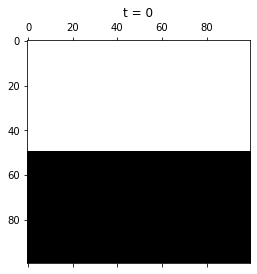

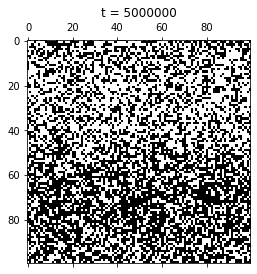

In [117]:
#Cambiar una celda aleatoria con alguno de sus vecinos (Fine-grained Array)
for tiempo in range(2*10**7+1):
    filaAleatoria=random.randint(0,n-1)
    columnaAleatoria=random.randint(0,n-1)
    valorIntercambiar=taza[filaAleatoria,columnaAleatoria]
    
    opcionCambio=random.randint(1,8)
    if opcionCambio==1: #cambio justo a la derecha
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria+1)
        nuevaFila=FilaPeriodica(n,filaAleatoria)
        
    elif opcionCambio==2: #cambio justo a la izquierda
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria-1)
        nuevaFila=FilaPeriodica(n,filaAleatoria)      

    elif opcionCambio==3: #cambio justo arriba
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria)
        nuevaFila=FilaPeriodica(n,filaAleatoria-1)      

    elif opcionCambio==4: #cambio justo abajo
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria)
        nuevaFila=FilaPeriodica(n,filaAleatoria+1)

    elif opcionCambio==5: #cambio diagonal superior izquierda
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria-1)
        nuevaFila=FilaPeriodica(n,filaAleatoria-1)

    elif opcionCambio==6: #cambio diagonal superior derecha
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria+1)
        nuevaFila=FilaPeriodica(n,filaAleatoria-1)

    elif opcionCambio==7: #cambio diagonal inferior izquierda
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria-1)
        nuevaFila=FilaPeriodica(n,filaAleatoria+1)

    else: #cambio diagonal inferior derecha
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria+1)
        nuevaFila=FilaPeriodica(n,filaAleatoria+1)

    taza[filaAleatoria,columnaAleatoria]=taza[nuevaFila,nuevaColumna]     
    taza[nuevaFila,nuevaColumna]=valorIntercambiar
    
    if tiempo==0 or tiempo==(6*10**5) or tiempo==(5*10**6):
        plt.matshow(taza,cmap=plt.cm.gray,vmin=0, vmax=1)  
        plt.title("t = "+str(tiempo))
        continue

### Coarse-grained Array

En este arreglo las partículas de café y crema se intercambian y se mezclan. 

In [118]:
#Crear matriz nxn
n=100
taza=np.zeros([n,n])

for i in range(int(n/2)):
    for j in range(n):
        taza[i,j] = 1

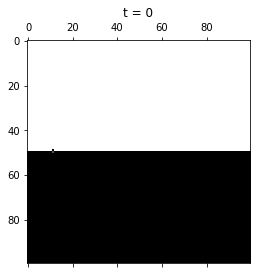

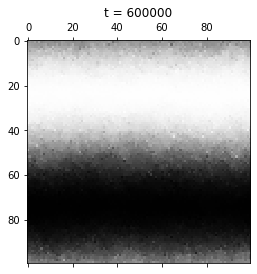

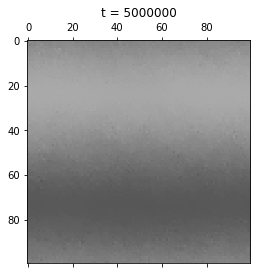

In [119]:
#Cambiar una celda aleatoria con alguno de sus vecinos (coarse-Grained Array)
for tiempo in range(2*10**7+1):
    filaAleatoria=random.randint(0,n-1)
    columnaAleatoria=random.randint(0,n-1)
    valorIntercambiar=taza[filaAleatoria,columnaAleatoria]
    
    opcionCambio=random.randint(1,8)
    if opcionCambio==1: #cambio justo a la derecha
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria+1)
        nuevaFila=FilaPeriodica(n,filaAleatoria)
        
    elif opcionCambio==2: #cambio justo a la izquierda
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria-1)
        nuevaFila=FilaPeriodica(n,filaAleatoria)      

    elif opcionCambio==3: #cambio justo arriba
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria)
        nuevaFila=FilaPeriodica(n,filaAleatoria-1)      

    elif opcionCambio==4: #cambio justo abajo
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria)
        nuevaFila=FilaPeriodica(n,filaAleatoria+1)

    elif opcionCambio==5: #cambio diagonal superior izquierda
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria-1)
        nuevaFila=FilaPeriodica(n,filaAleatoria-1)

    elif opcionCambio==6: #cambio diagonal superior derecha
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria+1)
        nuevaFila=FilaPeriodica(n,filaAleatoria-1)

    elif opcionCambio==7: #cambio diagonal inferior izquierda
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria-1)
        nuevaFila=FilaPeriodica(n,filaAleatoria+1)

    else: #cambio diagonal inferior derecha
        nuevaColumna=ColumnaPeriodica(n,columnaAleatoria+1)
        nuevaFila=FilaPeriodica(n,filaAleatoria+1)

    taza[filaAleatoria,columnaAleatoria]=taza[nuevaFila,nuevaColumna]     
    taza[nuevaFila,nuevaColumna]=valorIntercambiar
    
    #Promedio del cuadrado centrado en la celda cambiada
    vecinos=Vecinos(n,taza,filaAleatoria,columnaAleatoria)

    taza[filaAleatoria,columnaAleatoria]=(taza[filaAleatoria,columnaAleatoria]+vecinos[0]+vecinos[1]+vecinos[2]+vecinos[3]+vecinos[4]+vecinos[5]+vecinos[6]+vecinos[7])/9
    
    if tiempo==0 or tiempo==(6*10**5) or tiempo==(5*10**6):
        plt.matshow(taza,cmap=plt.cm.gray,vmin=0, vmax=1)  
        plt.title("t = "+str(tiempo))
        continue

## Modelo en el que no interactúan las partículas

Regla de transición para este modelo: en cada time step, cada partícula de crema en el sistema se mueve un paso
en una dirección elegida al azar.

In [120]:
#Definir partícula
class Particula:
    def __init__(self,sustancia, posX, posY):
        self.sustancia = sustancia 
        #eventualmente se podría modelar las partículas de café dándole a la sustancia un valor de cero
        self.posX = posX
        self.posY = posY
        
    def get_posicion(self):
        return self.posX, self.posY
    
    def set_nuevaPosicion(self, nuevaPosX, nuevaPosY):
        self.posX = nuevaPosX
        self.posY = nuevaPosY
        return
    
    def get_sustancia(self):
        return self.sustancia

In [121]:
#Definición de funciones
def CrearParticulas(pcantidadParticulas, psustancia, pn):
    return [Particula(psustancia, 
                      random.random()*pn,
                      random.random()*pn/2)
            for particula in range(pcantidadParticulas)]

def ColorSustancia(psustancia):
    if psustancia == "crema":
        return "white"
    else:
        return "black"
    
def CaminoAleatorio(pn, pPosX, pPosY):
    cambioPosX = random.randint(-1,1)
    cambioPosY = random.randint(-1,1)
    nuevaPosX = FilaPeriodica(pn, pPosX + cambioPosX)
    nuevaPosY = ColumnaPeriodica(pn, pPosY + cambioPosY)
    return nuevaPosX, nuevaPosY

Text(0.5, 1.0, 't = 0')

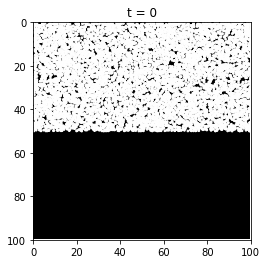

In [131]:
#Crear matriz nxn
n = 100
taza = np.zeros([n,n])

#Crear partículas
cantidadParticulas = 10000
Particulas = CrearParticulas(cantidadParticulas,"crema", n)
    
#Lista de las posiciones de las partícutas
listaPosiciones = []
for particula in Particulas:
    posicionParticula = particula.get_posicion()
    listaPosiciones.append(posicionParticula)
listaPosiciones = np.array(listaPosiciones)
       
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(taza,cmap = plt.cm.gray,vmin = 0)
ax.scatter(listaPosiciones[:,0],
            listaPosiciones[:,1],
            s = 3,
            c = [ColorSustancia(particula.get_sustancia()) for particula in Particulas])
ax.set_xlim([0,n])
ax.set_ylim([n,0])
ax.set_title("t = 0")

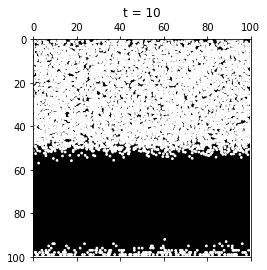

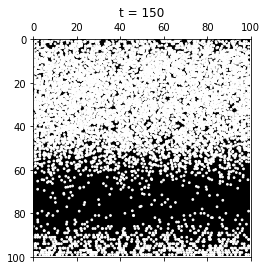

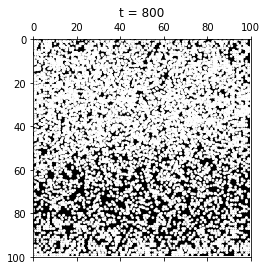

In [132]:
#Simulación: cada partícula de crema está dando un paseo

for tiempo in range(800+1):
    for particula in Particulas:
        posX = particula.get_posicion()[0]
        posY = particula.get_posicion()[1]
        nuevaPosicionX, nuevaPosicionY = CaminoAleatorio(n, posX, posY)
        particula.set_nuevaPosicion(nuevaPosicionX, nuevaPosicionY)

    #if tiempo==(6*10**5) or tiempo==(5*10**6):
    if tiempo==10 or tiempo==150 or tiempo==800:
        #Lista de las posiciones de las partícutas actualizada
        listaNuevasPosiciones = []
        for particula in Particulas:
            nuevaPosicionParticula = particula.get_posicion()
            listaNuevasPosiciones.append(nuevaPosicionParticula)
        
        listaNuevasPosiciones = np.array(listaNuevasPosiciones)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.matshow(taza,cmap = plt.cm.gray,vmin = 0)
        ax.scatter(listaNuevasPosiciones[:,0],
                    listaNuevasPosiciones[:,1],
                    s = 3,
                    c = [ColorSustancia(particula.get_sustancia()) for particula in Particulas])
        ax.set_xlim([0,n])
        ax.set_ylim([n,0])
        ax.set_title("t = "+str(tiempo))
        continue

# Cuantificación de la entropía 